In [43]:
%matplotlib inline

import matplotlib
matplotlib.style.use('seaborn-whitegrid')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import MiniBatchKMeans,KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import cdist,euclidean
from sklearn.preprocessing import normalize, StandardScaler,MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

from sklearn import svm



In [2]:
print(plt.style.available)

['seaborn-paper', 'seaborn-notebook', 'seaborn-deep', 'bmh', 'seaborn-poster', 'seaborn-darkgrid', 'seaborn-pastel', 'seaborn-dark', 'ggplot', 'seaborn-dark-palette', 'fivethirtyeight', 'grayscale', 'seaborn-colorblind', 'seaborn-whitegrid', 'dark_background', 'seaborn-white', 'seaborn-ticks', 'seaborn-bright', 'classic', 'seaborn-talk', 'seaborn-muted']


In [3]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 999)


In [4]:
pd.reset_option("display.max_rows")

In [5]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [6]:
attacks = ["back",
"buffer_overflow",
"ftp_write",
"guess_passwd",
"imap",
"ipsweep",
"land",
"loadmodule",
"multihop",
"neptune",
"nmap",
"perl",
"phf",
"pod",
"portsweep",
"rootkit",
"satan",
"smurf",
"spy",
"teardrop",
"warezclient",
"warezmaster"]

types = ["dos",
"u2r",
"r2l",
"r2l",
"r2l",
"probe",
"dos",
"u2r",
"r2l",
"dos",
"probe",
"u2r",
"r2l",
"dos",
"probe",
"u2r",
"probe",
"dos",
"r2l",
"dos",
"r2l",
"r2l"]

dic_attacks = {"label":attacks,"type":types}

attack_typesDF = pd.DataFrame(dic_attacks, columns=["label","type"])

In [7]:
features = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"label"]

types = ["continuous.",
"symbolic.",
"symbolic.",
"symbolic.",
"continuous.",
"continuous.",
"symbolic.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"symbolic.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"symbolic.",
"symbolic.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"symbolic."]


indicesf = []

for i in range(0, len(types)):
    if types[i] == "continuous.":
        indicesf.append(i)

numerical_features = np.take(features,indicesf)

indicesf = [0,5,11,14,15,16,17,18,30,31,36]

normal_relevant_features =  np.take(features,indicesf)

print (numerical_features)
print (normal_relevant_features)

escolhidas = [
"duration",
"src_bytes",
"dst_bytes",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate"]

print (escolhidas)

['duration' 'src_bytes' 'dst_bytes' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'num_compromised' 'root_shell' 'su_attempted'
 'num_root' 'num_file_creations' 'num_shells' 'num_access_files'
 'num_outbound_cmds' 'count' 'srv_count' 'serror_rate' 'srv_serror_rate'
 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate'
 'srv_diff_host_rate' 'dst_host_count' 'dst_host_srv_count'
 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
['duration' 'dst_bytes' 'logged_in' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_diff_host_rate']
['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_s

In [8]:
nslTrain = pd.read_csv(filepath_or_buffer='./dados/nsl-kdd/KDDTrain+.txt', \
                 names=columns, header=None)

In [9]:
nslTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [10]:
#for chunk in reader:
#    chunk.info()


## Teste 1 chunk
#chunk = reader.get_chunk(chunk_size)

In [11]:
nslTrain = pd.merge(nslTrain,attack_typesDF,how='left',on='label')
nslTrain = nslTrain.fillna('normal')

attack_indices = nslTrain[nslTrain.label != 'normal'].index
total_normal = len(nslTrain[nslTrain.label == 'normal'])


print('Total de tráfego normal:', total_normal)
print('Total de ataques:',len(attack_indices))

remove_n = len(attack_indices) - 8000
print('Quantidade de ataques utilizados:',len(attack_indices) - remove_n)
#print(remove_n)
drop_indices = np.random.choice(attack_indices, remove_n, replace=False)

# NSL KDD dataset with only 10% of attacks
nsl10Train = nslTrain.drop(drop_indices)

total = 20000

Total de tráfego normal: 67343
Total de ataques: 58630
Quantidade de ataques utilizados: 8000


In [12]:
def label_class(row):
    if row.label == 'normal':
        return 'normal'
    else:
        return 'normal'
    
nsl10Train['class'] = nsl10Train.apply(lambda row: label_class (row), axis=1)

In [13]:
nsl10Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75343 entries, 0 to 125972
Data columns (total 45 columns):
duration                       75343 non-null int64
protocol_type                  75343 non-null object
service                        75343 non-null object
flag                           75343 non-null object
src_bytes                      75343 non-null int64
dst_bytes                      75343 non-null int64
land                           75343 non-null int64
wrong_fragment                 75343 non-null int64
urgent                         75343 non-null int64
hot                            75343 non-null int64
num_failed_logins              75343 non-null int64
logged_in                      75343 non-null int64
num_compromised                75343 non-null int64
root_shell                     75343 non-null int64
su_attempted                   75343 non-null int64
num_root                       75343 non-null int64
num_file_creations             75343 non-null int64
num

In [14]:
nsl10Train.to_csv('./dados/KDDTrain+10att.csv',index=False)


In [15]:
nsl10k = nsl10Train.sample(n=10000,random_state=10)

In [16]:
nsl10k = nsl10k.reset_index()

In [17]:
nsl10k.to_csv('./dados/KDDTrain10k.csv',index=False)

In [18]:
nsl30k = nsl10Train.sample(n=30000,random_state=10)

In [19]:
nsl50k = nsl10Train.sample(n=50000,random_state=10)

In [20]:
nsl70k = nsl10Train.sample(n=70000,random_state=10)

In [21]:
total = 20000
#total = len(nsl10Train)
print(total)

20000


In [22]:
nslTrain['type'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

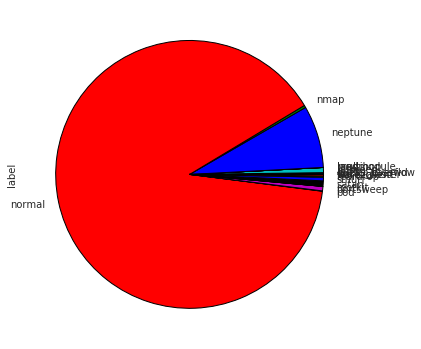

In [23]:
#chunk = chunk[chunk.label != 'neptune']
grouped_label = nsl10Train.groupby('label')
grouped_label['label'].count().plot.pie(figsize=(6, 6))

In [24]:
grouped_label = nsl10Train.groupby('label')

In [25]:
std_scaler = StandardScaler()
std_scaler.fit(nsl10Train[numerical_features])

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(nsl10Train[numerical_features])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
#sub = chunk[escolhidas]
#sub = chunk[normal_relevant_features]

In [27]:
#proto_dummies = pd.get_dummies(sub["protocol_type"], prefix='protocol_type')
#service_dummies = pd.get_dummies(sub['service'], prefix='service')
#flag_dummies = pd.get_dummies(sub['flag'], prefix='flag')

In [28]:
#subDF = pd.concat([sub,proto_dummies,service_dummies,flag_dummies], axis=1)
#subDF = subDF.drop(['protocol_type','service','flag'], axis=1)


In [29]:
def plot_PCA(X, dblabels, chunk_labels):   
    pca_2 = PCA(2)

    plot_columns = pca_2.fit_transform(X)

    plt.figure(figsize=(20,20))

    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=dblabels)


    for lb, x, y in zip(chunk_labels, plot_columns[:,0],plot_columns[:,1]):
        plt.annotate(
            lb,
            xy = (x,y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0',facecolor='black'))

    plt.show()

In [30]:
import numpy as np

def fK(k, X, Skm1=0):
    """
    Computes f(K) proposed by Pham et al. 2004
    
    """
    d = len(X[0])
    
    a = lambda k, d: 1.0 - 3.0 / (4.0*d) if k == 2 \
        else a(k-1, d) + (1.0-a(k-1,d))/6.0
    
    estimator = MiniBatchKMeans(n_clusters=k, random_state=10, 
                                init='k-means++')
    estimator.fit_predict(X)
    Sk = estimator.inertia_
        
    if k == 1:
        f = 1
    if Skm1 == 0:
        f = 1
    else:
        f = Sk/(a(k,d)*Skm1)  
    
    return f, Sk


def testfK(maxk, X):
    ks = range(1,maxk+1)
    fs = np.zeros(len(ks))

    k = 1

    fs[0], Sk = fK(1, X)
    print (("# K: {}\tFS:{}\tSk:{}").format(k,fs[k-1], Sk))


    # Rest of Ks
    for k in ks[1:]:
        fs[k-1], Sk = fK(k, X, Skm1=Sk)
        print (("# K: {}\tFS:{}\tSk:{}").format(k,fs[k-1], Sk))

    foundfK = np.where(fs == fs.min())[0][0] + 1
    print (foundfK)

def testMeandist(maxk,X):
    meandist = []

    clusters = range(1,maxk)

    for n_clusters in clusters:
        clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
        clusassign = clusterer.fit_predict(X)
        meandist.append(sum(np.min(cdist(X, clusterer.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    #    print("# {}: {}")\
    #        .format(n_clusters, meandist[n_clusters-1])  

    fig = plt.figure()
    
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')
    plt.title('Selecting K with the Elbow Method')
    plt.plot(clusters, meandist)
    
def testInertia(maxk,X):
    
    inertia = []
    
    for k in range (1,maxk+1):
        k_means = MiniBatchKMeans(n_clusters=k, random_state=10, init='k-means++')
        k_means.fit(X)
        inertia.append(k_means.inertia_)
        
    ax = plt.subplot(111)
    ax.plot(inertia, '-o')
    plt.xticks(range(1,maxk))
    plt.title("Inertia")
    ax.set_ylabel('Inertia')
    ax.set_xlabel('# Clusters')
    plt.show() 

In [31]:
def euclidean_dist_calc(X, y, cluster_centers_):
    
    c_indices = []
    
    n_clusters = len(cluster_centers_)


    for i in range(0,n_clusters):
        c_indices.append(np.where(y == i)[0])
           
    euclidian_dist = np.empty(len(X))
    euclidian_dist.fill(np.nan)
    
    for k in range(0, n_clusters):
    
        for i in c_indices[k]:
            euclidian_dist[i] = euclidean(X[i], cluster_centers_[k]) 
            
    return euclidian_dist



def threshold_error (v, w, tau):
    """
    Recebe um elemento de dado (v) e calcula seu TEV em relação
    ao centróide (w) de acordo com um limiar tau.
    
    Retorna uma tupla com o TEV e o TEQ
    """

    #print(v)
    #print(w)
    
    
    #se algum dos vetores de data_list tiver dimensão diferente da de center, o programa finaliza
    if (len(v) != len(w)) | (v.ndim != w.ndim):

        print ("Data_list and center have diffent numbers of elements!")
        return 0

    tev = 0
    teq = 0
    
    qe = abs(w - v) #diff armazena um vetor com o módulo da diferença entre os elementos de w e v
    
    #print(qe)
    
    for i in range (len(qe)):
        teq = teq + qe[i]
        if (qe[i] > tau):
            tev = tev + qe[i]
        
    #print ("The threshold error value for QE =", qe, "is", tev, "and TEQ is",teq)
    
    return (tev,teq)
        
        
a = np.array([1, 2])
b = np.array([2,4])
w = np.array([17, 18])

threshold_error(a, w, 14)
threshold_error(b, w, 14)

def update_W (v, w, n, m, alpha):

    #se algum dos vetores de data_list tiver dimensão diferente da de center, o programa finaliza
    if (v.ndim != w.ndim):
        print ("Data_list and center have diffent numbers of elements!")
        return 0

    #m = len(v)
    
    x = v
    
    w = (w * n * alpha + x*m)/(n * alpha + m)
    
    #diff = w - v #diff armazena um vetor com a diferença entre os elementos de w e v
    #print(diff)
    #for i in range (len(diff)):
    #    w = alpha*w +  diff[i]
    return (w)

a = np.array([[1,2], [3,4], [5,6]])
b = np.array([5, 6])

update_W (a.mean(axis=0), b, 3, len(a), 0.1)

def tev_teq (v,centers,tau, model):
    result = []
    
    for i in range(len(v)):
        result.append(threshold_error(v[i],model.cluster_centers_[centers[i]],tau))
        
    return result

In [32]:
#labels = nsl10Train['label'].values
#subDF = nsl10Train[numerical_features]
#cols = subDF.columns.tolist()

#X = std_scaler.transform(subDF)

In [33]:
#Kmeans = MiniBatchKMeans(n_clusters=40,random_state=10, init='k-means++')

In [34]:
#y = Kmeans.fit_predict(X)

In [35]:
def run_train(eps_, min_samples_, kmodel, E, chunk_size=2000, tau1=0.5, tau2=1.0, rd_threshold=0.5, alpha=1.0, adapt=True, fw=True):
    

    total_FW = 0
    
    DB_N_cluster = []
    DB_TPR = []
    DB_FPR = []
    DB_precision = []
    DB_FS = []
    
    KM_ED_TPR = []
    KM_ED_FPR = []
    KM_ED_precision = []
    KM_ED_FS = []

    KM_TE_TPR = []
    KM_TE_FPR = []
    KM_TE_precision = []
    KM_TE_FS = []
    
    SVM_TPR = []
    SVM_FPR = []
    SVM_precision = []
    SVM_FS = []
    

    indices = []    
    
    i = 0
    
    clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.1)
   
    
    while (i < total):

        indices.append(i)

        if (i + chunk_size) < total:
            chunk = nsl10Train[i:(i + chunk_size)]
        else:
            chunk = nsl10Train[i:total]
        i = i + chunk_size

        chunk_labels = chunk['label'].values
        chunk_classes = chunk['class'].values
        chunk_difficulty = chunk['difficulty'].values
        qtd_normal = chunk[chunk.label == 'normal'].count()[0]
        qtd_attack = chunk[chunk.label != 'normal'].count()[0]

        subDF = chunk[numerical_features]
        cols = subDF.columns.tolist()

        #X = minmax_scaler.transform(subDF)
        #X = normalize(subDF)
        X = std_scaler.transform(subDF)


        ## DBSCAN
        db = DBSCAN(eps=eps_, min_samples=min_samples_,random_state=10).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        dblabels = db.labels_

        outliers = 1 if -1 in dblabels else 0

        n_clusters_ = len(set(dblabels)) - (outliers)
        DB_N_cluster.append(n_clusters_)
        #print("N_clusters: {}".format(n_clusters_))


        resultDF = pd.DataFrame(X, columns=cols)
        resultDF['DBcluster'] = dblabels

        media = resultDF.groupby('DBcluster').mean().values

        resultDF['label'] = chunk_labels
        resultDF['class'] = chunk_classes

        resultDF['DB_ED'] = euclidean_dist_calc(X, dblabels,media[1:] if outliers else media)
        resultDF['difficulty'] = chunk_difficulty

        #variance = resultDF.groupby('DBcluster')['DB_ED'].std()

        # Densidade (numero de pontos) pertencentes a um cluster
        Dc = []

        for k in range(0, n_clusters_):        
            #density.append((resultDF[resultDF.DBcluster == k]['DB_ED']).apply(lambda x: math.exp(-x**2/(2*(variance[k]**2)))).sum())
            #Dc.append(resultDF[resultDF.DBcluster == k].count()[0])
            Dc = resultDF.groupby('DBcluster')['DB_ED'].count()

        # Densidade esperada dos clusters (neste caso será utilizada a média entre o número de elementos e o número de clusters)
        try:
            EDs = chunk_size / n_clusters_
            
            RD = Dc / EDs

            normal_clusters = (RD[RD >= rd_threshold].index)
            anomaly_clusters = (RD[RD < rd_threshold].index)
                       
        
        except:
            
            normal_clusters = pd.Series([])
            anomaly_clusters = pd.Series([-1])
            
            
        TP = (resultDF[resultDF.DBcluster.isin(anomaly_clusters.values)][resultDF.label != 'normal'])
        FN = (resultDF[resultDF.DBcluster.isin(normal_clusters.values)][resultDF.label != 'normal'])
        FP = (resultDF[resultDF.DBcluster.isin(anomaly_clusters.values)][resultDF.label == 'normal'])
               

        tpr = len(TP) / qtd_attack
        fpr = len(FP) / qtd_normal
        
        try:         
            precision = len(TP)/(len(TP) + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr)) 
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0        
        
        DB_TPR.append(tpr)
        DB_FPR.append(fpr)
        DB_precision.append(precision)              
        DB_FS.append(f_score)


        normal = resultDF[resultDF.DBcluster.isin(normal_clusters.values)]
        anomaly = resultDF[resultDF.DBcluster.isin(anomaly_clusters.values)]

        normal['Detect'] = 0
        anomaly['Detect'] = -1

        
        if i - chunk_size == 0:        
            if len(normal) > 0:        
                normal['KMcluster'] = kmodel.fit_predict(normal[numerical_features].values)

            else:
                kmodel.partial_fit(anomaly[numerical_features].values)
                
                
        elif adapt == True:
            #print('Adapting...')
            if len(normal) != 0:                
            
                centers = kmodel.cluster_centers_
                #print(centers)
                normal['KMcluster'] = kmodel.predict(normal[numerical_features].values)
                v = normal.groupby('KMcluster')[numerical_features].mean().values
                #print(v)
                for c in range(len(v)):
                    centers[c] = update_W(v[c],centers[c], (i-chunk_size), chunk_size, alpha)

                kmodel.cluster_centers_ = centers

                #print(kmodel.cluster_centers_)
        else:
            if len(normal) > 0 :
                normal['KMcluster'] = kmodel.predict(normal[numerical_features].values)
           
                

        
        anomaly['KMcluster'] = kmodel.predict(anomaly[numerical_features].values)
        anomaly['KM_ED'] = euclidean_dist_calc(anomaly[numerical_features].values,
                                               anomaly['KMcluster'].values,
                                               kmodel.cluster_centers_)

        anomaly['TEV'] = 0
        anomaly['TEQ'] = 0
        anomaly[['TEV','TEQ']] = tev_teq(anomaly[numerical_features].values,
                                         anomaly.KMcluster.values, 
                                         tau1, kmodel)
        
        normal['TEV'] = 0
        normal['TEQ'] = 0
        #normal[['TEV','TEQ']] = tev_teq(normal[numerical_features].values,
        #                                 normal.KMcluster.values, 
        #                                 tau1, kmodel)

   

        
        if i - chunk_size == 0:        
            if len(normal) > 0:        
                clf.fit(normal[numerical_features].values)
            else:
                clf.fit(anomaly[numerical_features].values)

        
        

        anomaly['OneSVM'] = clf.predict(anomaly[numerical_features].values)
        #TP
        TP = anomaly[anomaly.label != 'normal'][anomaly.OneSVM == -1]
        #FP
        FP = anomaly[anomaly.label == 'normal'][anomaly.OneSVM == -1]
        #FN
        FN = anomaly[anomaly.label != 'normal'][anomaly.OneSVM != -1]
        
        
        tpr = len(TP) / qtd_attack
        fpr = len(FP) / qtd_normal
        
        try:         
            precision = len(TP)/(len(TP) + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr)) 
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0        
        
        SVM_TPR.append(tpr)
        SVM_FPR.append(fpr)
        SVM_precision.append(precision)              
        SVM_FS.append(f_score)        
        
        
        
        #KM_limiar = anomaly.groupby('KMcluster')['KM_ED'].quantile(tau2)
        #KM_limiar = pd.Series([1.1,2.0,2.0,1.5,2.1])
        #print(KM_limiar)


        #Verdadeiro positivo: ED é maior do que o limiar e é ataque
        TP = (anomaly[anomaly.KM_ED > E][anomaly.label != "normal"])

        #Falso negativo: ED é menor que o limiar, mas é ataque
        FN = (anomaly[anomaly.KM_ED <= E][anomaly.label != "normal"])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        FP = (anomaly[anomaly.KM_ED > E][anomaly.label == "normal"])
        
        tpr = len(TP) / qtd_attack
        fpr = len(FP) / qtd_normal
        
        try:         
            precision = len(TP)/(len(TP) + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr)) 
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0
        
        KM_ED_TPR.append(tpr)
        KM_ED_FPR.append(fpr)
        KM_ED_precision.append(precision)              
        KM_ED_FS.append(f_score)
        
     
        
        #if tau2 == 0:
        #    tau2 = normal['TEV'].max()
        #else:
        #    tau2 = (normal['TEV'].max() + tau2) / 2
        
        
        #KM_limiar = anomaly.groupby('KMcluster')['TEV'].quantile(tau2)
        #print(KM_limiar)

        #Verdadeiro positivo: ED é maior do que o limiar e é ataque
        TP = (anomaly[anomaly.TEV > E][anomaly.label != "normal"])

        #Falso negativo: ED é menor que o limiar, mas é ataque
        FN = (anomaly[(anomaly['TEV'] <= E) & (anomaly['TEV'] <= tau2)][anomaly.label != "normal"])
        FW = (anomaly[(anomaly['TEV'] <= E) & (anomaly['TEV'] > tau2)][anomaly.label != "normal"])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        FP = (anomaly[anomaly.TEV > E][anomaly.label == "normal"])        
        
        
                
        
        if fw:
            #print('Encaminhando:',len(FW), 'tau2:', tau2)
            tp = (len(TP) + len(FW))           
            
            
            FW = (anomaly[(anomaly['TEV'] <= E) & (anomaly['TEV'] > tau2)])
            total_FW = total_FW + len(FW)
        else:
            tp = len(TP)            
        
        
        tpr =  tp / qtd_attack
        
        fpr = len(FP) / qtd_normal
        
        try:
            precision = tp /(tp + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr))
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0      
        
        KM_TE_TPR.append(tpr)
        KM_TE_FPR.append(fpr)
        KM_TE_precision.append(precision)              
        KM_TE_FS.append(f_score)
        
        
        
        
    tprD = {'DB_TPR': pd.Series(DB_TPR, index=indices),
           'ED_TPR':pd.Series(KM_ED_TPR, index=indices),
           'TE_TPR':pd.Series(KM_TE_TPR, index=indices),
           'SVM_TPR': pd.Series(SVM_TPR, index=indices) }

    tprDF = pd.DataFrame(tprD)


    fprD = {'DB_FPR': pd.Series(DB_FPR, index=indices),
           'ED_FPR':pd.Series(KM_ED_FPR, index=indices),
           'TE_FPR':pd.Series(KM_TE_FPR, index=indices),
           'SVM_FPR': pd.Series(SVM_FPR, index=indices)
          }
    fprDF = pd.DataFrame(fprD)
    
    
    precisionDF = pd.DataFrame({
           'DB_precision':pd.Series(DB_precision, index=indices),
           'ED_precision':pd.Series(KM_ED_precision, index=indices),
           'TE_precision':pd.Series(KM_TE_precision, index=indices),
           'SVM_precision': pd.Series(SVM_precision, index=indices)
        } 
    )
    
    fsDF = pd.DataFrame({
            'DB':pd.Series(DB_FS, index=indices),
           'ED':pd.Series(KM_ED_FS, index=indices),
           'TE':pd.Series(KM_TE_FS, index=indices),
           'SVM': pd.Series(SVM_FS, index=indices)
        } 
    )
    
    
    #plot_PCA(anomaly[numerical_features], anomaly.KMcluster, chunk_labels)
    
    print (total_FW)
    
    return (tprDF, fprDF, precisionDF, fsDF)
    
    

In [36]:
eps_values = [1.0,1.5,2.0,2.5,3.0]
#eps_values = [1.0]
min_values = [4,8,16,32,64,128,256]
#min_values = [160,320]
#db_threshold_values = [0.2,0.4,0.6,0.8]

In [ ]:
import sys

kmodel = MiniBatchKMeans(n_clusters=5,random_state=10, init='k-means++')



dic = {}

for i in range (0,len(eps_values)):
    print('\n\n-- eps:', eps_values[i])
    
    tpr = []
    fpr = []
    
    tpr.append(0.0)
    fpr.append(0.0)
    
    for j in range (0, len(min_values)):
        #print('---- min_samples:', min_values[j])

        
        #for k in range (0, len(db_threshold_values)):
        

        #print('------ db_threshold:', db_threshold_values[k])


        tprDF,fprDF,precisionDF,fsDF = run_train(eps_=eps_values[i],
                                 min_samples_=min_values[j], 
                                 E=0.9, 
                                 kmodel=kmodel,
                                 chunk_size=500,
                                 tau1=0.6,
                                 rd_threshold=0.5,
                                 alpha=0.1,
                                 tau2=1.0 
                                )

        print('min_samples:',min_values[j],'\t', tprDF.DB_TPR.mean(), '\t', fprDF.DB_FPR.mean(), '\t', fsDF.DB.mean())

        tpr.append(tprDF.DB_TPR.mean())
        fpr.append(fprDF.DB_FPR.mean())
    
    dic[eps_values[i]] = (tpr, fpr)
    
print(dic)




-- eps: 1.0
0
min_samples: 4 	 0.838207260934 	 0.347953949192 	 0.345512607737
0
min_samples: 8 	 0.995635252515 	 0.401366582144 	 0.37090854498
0
min_samples: 16 	 0.997082836818 	 0.487405740648 	 0.330684568099
0
min_samples: 32 	 1.0 	 0.984644427932 	 0.195438102334
0
min_samples: 64 	 1.0 	 1.0 	 0.191646256154
0
min_samples: 128 	 1.0 	 1.0 	 0.191646256154
0
min_samples: 256 	 1.0 	 1.0 	 0.191646256154


-- eps: 1.5
0
min_samples: 4 	 0.870693023424 	 0.226389808105 	 0.452134680114
0
min_samples: 8 	 0.983951497595 	 0.240587062712 	 0.49012682596
0
min_samples: 16 	 0.987128938761 	 0.295633654131 	 0.442751379461
0
min_samples: 32 	 0.991856125414 	 0.420042839949 	 0.366946710773
0
min_samples: 64 	 0.99448220157 	 0.566483492594 	 0.316090532082
0
min_samples: 128 	 0.999862030905 	 0.977697655716 	 0.197520680165
0
min_samples: 256 	 1.0 	 1.0 	 0.191646256154


-- eps: 2.0
0
min_samples: 4 	 0.809583038203 	 0.18342910035 	 0.468863971832
0
min_samples: 8 	 0.972375

In [37]:
import pickle

In [ ]:
with open('dic.pkl', 'wb') as pickle_file:
    pickle.dump(dic, pickle_file)

In [38]:
with open('dic.pkl', 'rb') as pickle_file:
    dic = pickle.load(pickle_file)

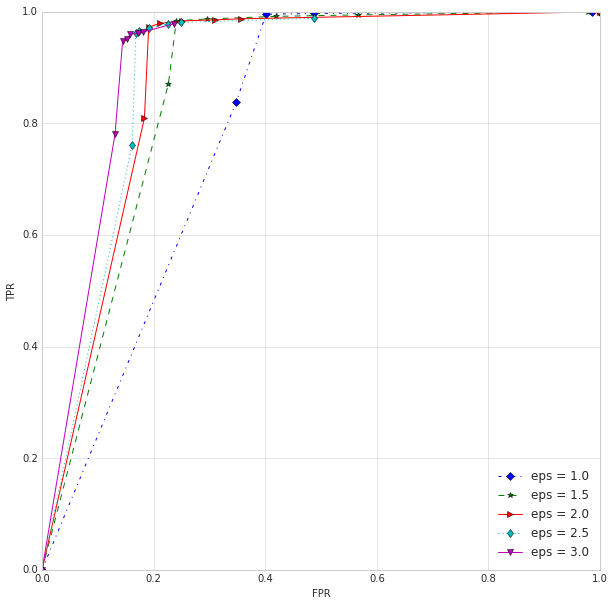

In [41]:
plt.figure(figsize=(10,10))
plt.ylabel('TPR')
plt.xlabel('FPR')

plt.plot(dic[eps_values[0]][1], dic[eps_values[0]][0], ls='-.', label='eps = ' + str(eps_values[0]), marker='D')

plt.plot(dic[eps_values[1]][1], dic[eps_values[1]][0], ls='--', label='eps = '+ str(eps_values[1]), marker='*')

plt.plot(dic[eps_values[2]][1], dic[eps_values[2]][0], ls='-', label='eps = '+ str(eps_values[2]), marker='>')

plt.plot(dic[eps_values[3]][1], dic[eps_values[3]][0], ls=':', label='eps = '+ str(eps_values[3]), marker='d')

plt.plot(dic[eps_values[4]][1], dic[eps_values[4]][0], ls='solid', label='eps = '+ str(eps_values[4]), marker='v')

plt.legend(loc=4)



plt.savefig('./figuras/dbs-eps-nsl.png')

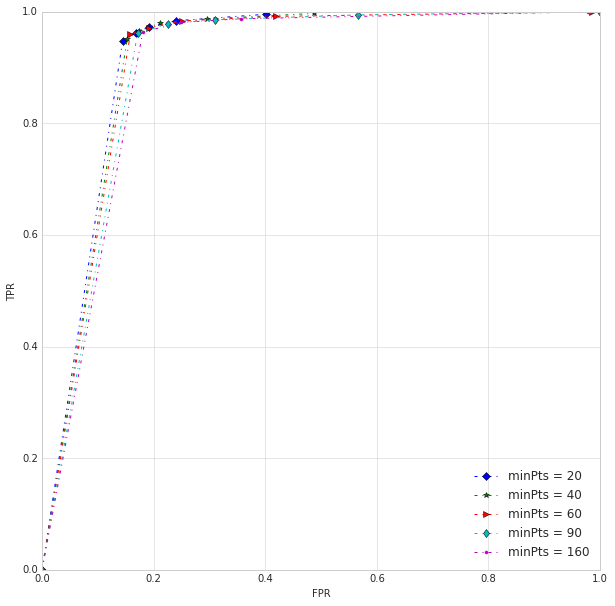

In [42]:
plt.figure(figsize=(10,10))

plt.ylabel('TPR')
plt.xlabel('FPR')


lab = ['minPts = 20','minPts = 40','minPts = 60','minPts = 90','minPts = 160','minPts = 320','minPts = 420']
mark = ['D','*','>','d','.','o','<']

for i  in range(0,5):
    
    x = [0.0, dic[eps_values[0]][1][i+2],dic[eps_values[1]][1][i+2],dic[eps_values[2]][1][i+2],dic[eps_values[3]][1][i+2],dic[eps_values[4]][1][i+2]]
    y = [0.0, dic[eps_values[0]][0][i+2],dic[eps_values[1]][0][i+2],dic[eps_values[2]][0][i+2],dic[eps_values[3]][0][i+2],dic[eps_values[4]][0][i+2]]
       
    x.sort()
    y.sort()
    
    plt.plot(x, y, ls='-.', label=lab[i], marker=mark[i])

plt.legend(loc=4)

plt.savefig('./figuras/dbs-min-nsl.png')

In [44]:
minPt = 128
ep = 2.5
n = 500

In [51]:
eps_ed = [4,5,6,8,10,12]

ks = [1,2,4,8,16,32]

k_dic = {}

for k in ks:

    
    tpr = []
    fpr = []
    
    kmodel = MiniBatchKMeans(n_clusters=k,random_state=10, init='k-means++')

    print('--k:', k)
    
    for e in eps_ed:
        tprDF,fprDF,precisionDF,fsDF = run_train(eps_=2.5,
                                 min_samples_=100,
                                 E=e, 
                                 kmodel=kmodel,
                                 chunk_size=500,
                                 tau1=0,
                                 rd_threshold=0.5,
                                 alpha=1.0,
                                 tau2=e,
                                 adapt=True
                                )
        print('e:', e,'\t',tprDF.ED_TPR.mean(),'\t',fprDF.ED_FPR.mean(),'\t',fsDF.ED.mean())
    
        tpr.append(tprDF.ED_TPR.mean())
        fpr.append(fprDF.ED_FPR.mean())
    
    k_dic[k] = (tpr, fpr)
    

--k: 1
0
e: 4 	 0.975270339827 	 0.199995538358 	 0.540758718042
0
e: 5 	 0.958323169465 	 0.152153612408 	 0.598811057327
0
e: 6 	 0.927102480693 	 0.11858174207 	 0.640032089456
0
e: 8 	 0.884801454163 	 0.0652511038388 	 0.731645913987
0
e: 10 	 0.19217544178 	 0.0175739141445 	 0.28524410115
0
e: 12 	 0.0817167101967 	 0.0118500647103 	 0.136592173588
--k: 2
0
e: 4 	 0.970073268604 	 0.189315389259 	 0.552051233953
0
e: 5 	 0.956550167084 	 0.144738518369 	 0.609478180836
0
e: 6 	 0.920604231554 	 0.115488782583 	 0.642570866064
0
e: 8 	 0.867663362456 	 0.0634510998841 	 0.726783518529
0
e: 10 	 0.188033549879 	 0.0166189896037 	 0.281704596117
0
e: 12 	 0.0803453356696 	 0.0117932465284 	 0.134367514282
--k: 4
0
e: 4 	 0.966580159339 	 0.167442095165 	 0.580131271599
0
e: 5 	 0.933392345478 	 0.129484345376 	 0.624074422478
0
e: 6 	 0.914798652679 	 0.104995303389 	 0.659509278427
0
e: 8 	 0.854144162282 	 0.0559824252412 	 0.738189074446
0
e: 10 	 0.147302883482 	 0.015328970306

In [53]:
with open('dic_ks.pkl', 'wb') as pickle_file:
    pickle.dump(k_dic, pickle_file)

In [ ]:
with open('dic_ks.pkl', 'rb') as pickle_file:
    k_dic = pickle.load(pickle_file)

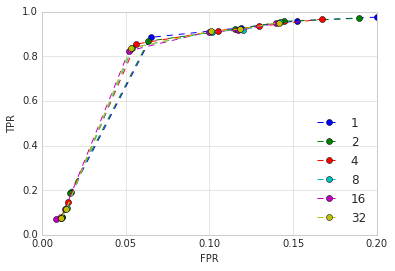

In [55]:
plt.figure()
plt.ylabel('TPR')
plt.xlabel('FPR')


for k in ks:
    x = k_dic[k][1]
    y = k_dic[k][0]
    
    x.sort()
    y.sort()
    
    plt.plot(x,y,label = k, ls='--',marker='o')
    
plt.legend(loc=4)

plt.yticks = [0,0.25,0.5,0.75,1.0]
plt.xticks = [0,0.25,0.5,0.75,1.0]



plt.savefig('./figuras/many-ks.png')

In [59]:
test_alpha = [0,1.0]

dic_alpha = {}

kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

tprDF,fprDF,precisionDF,fsDF = run_train(eps_=ep,
                         min_samples_=minPt,
                         E=6.0, 
                         kmodel=kmodel,
                         chunk_size=n,
                         
                         rd_threshold=0.5,
                         
                         
                         adapt=False
                        )

print('no_adapt:\t',tprDF.ED_TPR.mean(),'\t',fprDF.ED_FPR.mean(),'\t',fsDF.ED.mean())

dic_alpha['no_adapt'] = (tprDF.ED_TPR.mean(),fprDF.ED_FPR.mean())

for a in test_alpha:
    kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

    
    
    tprDF,fprDF,precisionDF,fsDF = run_train(eps_=ep,
                             min_samples_=minPt,
                             E=5.0, 
                             kmodel=kmodel,
                             chunk_size=n,
                             
                             rd_threshold=0.5,
                             alpha=a,
                             
                             adapt=True
                            )
    
    print('alpha:', a,'\t',tprDF.ED_TPR.mean(),'\t',fprDF.ED_FPR.mean(),'\t',fsDF.ED.mean())
    dic_alpha[a] = (tprDF.ED_TPR.mean(),fprDF.ED_FPR.mean())
    
print(dic_alpha)


457
no_adapt:	 0.938552880946 	 0.130546783626 	 0.624687098762
402
alpha: 0 	 0.934158541004 	 0.128748182731 	 0.625699728033
397
alpha: 1.0 	 0.933392345478 	 0.129484345376 	 0.624074422478
{0: (0.93415854100388596, 0.12874818273065497), 1.0: (0.9333923454779024, 0.12948434537634279), 'no_adapt': (0.93855288094615619, 0.13054678362587241)}


In [63]:
eps_ed = [2,4,6,8,10,12]
tau1_ = [0,1,2,3,4]

kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')


for t in tau1_:
    print ('-- tau1:', t)
    for e in eps_ed:
        tprDF,fprDF,precisionDF,fsDF = run_train(eps_=ep,
                                 min_samples_=minPt,
                                 E=e, 
                                 kmodel=kmodel,
                                 chunk_size=n,
                                 tau1=t,
                                 rd_threshold=0.5,
                                 alpha=1.0,
                                 tau2=e,
                                 adapt=True,
                                 fw = False
                                )
        print('e:', e,'\t',tprDF.TE_TPR.mean(),'\t',fprDF.TE_FPR.mean(),'\t',fsDF.TE.mean())
    

-- tau1: 0
0
e: 2 	 0.982158412037 	 0.231375213735 	 0.507759323789
0
e: 4 	 0.982158412037 	 0.226544707939 	 0.512880685749
0
e: 6 	 0.978493529291 	 0.20789211134 	 0.532645417734
0
e: 8 	 0.966552531657 	 0.157542389624 	 0.594533759888
0
e: 10 	 0.943610510739 	 0.123108891834 	 0.639733776053
0
e: 12 	 0.920388170216 	 0.0934525071402 	 0.685387217524
-- tau1: 1
0
e: 2 	 0.981727377554 	 0.224017984838 	 0.515480601487
0
e: 4 	 0.978963797923 	 0.20391144419 	 0.537658667948
0
e: 6 	 0.970948949566 	 0.162996986284 	 0.588556671521
0
e: 8 	 0.944525196499 	 0.123784652615 	 0.638953085494
0
e: 10 	 0.921093516387 	 0.093853569771 	 0.685176807164
0
e: 12 	 0.895071772006 	 0.0771192012404 	 0.708344595493
-- tau1: 2
0
e: 2 	 0.980872614258 	 0.211389098551 	 0.529495933705
0
e: 4 	 0.960435243449 	 0.162448487817 	 0.584659047604
0
e: 6 	 0.950875111081 	 0.140673972698 	 0.61375955971
0
e: 8 	 0.920968261348 	 0.0922815563189 	 0.68810353557
0
e: 10 	 0.874725587488 	 0.0765702

In [64]:
tau1_ = [3]

tau2_ = [0,2,4,6,8]


kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

t2_tpr = []
t2_fpr = []
t2_indice = []

for t1 in tau1_:
    print ('-- tau1:', t1)
    for t2 in tau2_:
        tprDF,fprDF,precisionDF,fsDF = run_train(eps_=ep,
                                 min_samples_=minPt,
                                 E=10, 
                                 kmodel=kmodel,
                                 chunk_size=500,
                                 tau1=t1,
                                 rd_threshold=0.5,
                                 alpha=1.0,
                                 tau2=(t1+t2),
                                 adapt=True,
                                 fw = True
                                )
        print('tau2:', t1+t2,'\t',tprDF.TE_TPR.mean(),'\t',fprDF.TE_FPR.mean(),'\t',fsDF.TE.mean())
        t2_tpr.append(tprDF.TE_TPR.mean())
        t2_fpr.append(fprDF.TE_FPR.mean())
        t2_indice.append(t1+t2)

-- tau1: 3
2323
tau2: 3 	 0.97060958653 	 0.0633802049823 	 0.779876935413
1126
tau2: 5 	 0.925432595741 	 0.0633802049823 	 0.757075120715
690
tau2: 7 	 0.912618231892 	 0.0633802049823 	 0.750513200471
155
tau2: 9 	 0.905374984608 	 0.0633802049823 	 0.74673291396
0
tau2: 11 	 0.865293472498 	 0.0633802049823 	 0.725575396378


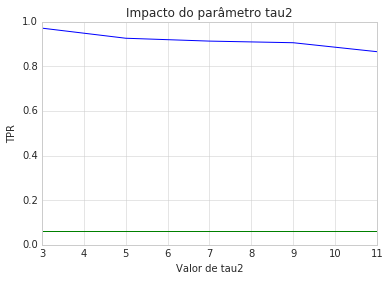

In [65]:
plt.ylabel('TPR')
plt.xlabel('Valor de tau2')
plt.title('Impacto do parâmetro tau2')


plt.plot(t2_indice,t2_tpr)
plt.plot(t2_indice,t2_fpr)

plt.legend(loc=4)

plt.show()

In [ ]:
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

tprDF,fprDF,precisionDF,fsDF = run_train(eps_=ep,
                                         min_samples_=minPt,
                                         E=10, 
                                         kmodel=kmodel,
                                         chunk_size=n,
                                         tau1=0.7,
                                         rd_threshold=0.5,
                                         alpha=0.5,
                                         tau2=0.7                         
                                        )

print(tprDF.DB_TPR.mean(), '\t', fprDF.DB_FPR.mean(),'\t', fsDF.DB.mean())
print(tprDF.ED_TPR.mean(), '\t', fprDF.ED_FPR.mean(),'\t', fsDF.ED.mean())
print(tprDF.TE_TPR.mean(), '\t', fprDF.TE_FPR.mean(),'\t', fsDF.TE.mean())
print(tprDF.SVM_TPR.mean(), '\t', fprDF.SVM_FPR.mean(),'\t', fsDF.SVM.mean())

In [ ]:
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

tprDF,fprDF = run_train(eps_=0.8,
                         min_samples_=100,
                         E=1.0, 
                         kmodel=kmodel,
                         chunk_size=500,
                         tau1=0.7,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=0.7                         
                        )

print(tprDF.DB_TPR.mean(), '\t', fprDF.DB_FPR.mean())
print(tprDF.ED_TPR.mean(), '\t', fprDF.ED_FPR.mean())
print(tprDF.TE_TPR.mean(), '\t', fprDF.TE_FPR.mean())
print(tprDF.SVM_TPR.mean(), '\t', fprDF.SVM_FPR.mean())

In [ ]:
tprDF.plot(title='Teste')

In [ ]:
fprDF.plot()

In [ ]:
#variance = anomaly.groupby('KMcluster')['KM_ED'].std()
#density = []

#for k in range(0, n_clusters_):
        
#    density.append((anomaly[anomaly.KMcluster == k]['KM_ED']).apply(lambda x: math.exp(-x**2/(2*(variance[k]**2)))).sum())
    
#total = anomaly.groupby('KMcluster')['KM_ED'].count()

#print(density / total)

In [ ]:
#density / total

In [ ]:
#KM_limiar

In [ ]:
#test = anomaly.groupby(('KMcluster','label')).describe()['KM_ED']

In [19]:
nsl10LOF = pd.read_csv(filepath_or_buffer='./dados/KDDTrain10k-LOF.csv', \
                 header=0)